<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
plt.style.use('seaborn')
#plt.rcParams['figure.figsize'] = (12, 8)
#%config InlineBackend.rc={'figure.figsize': (12, 8)}

In [3]:
dados = pd.read_csv('bike_sharing_data.txt')

In [4]:
dados.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

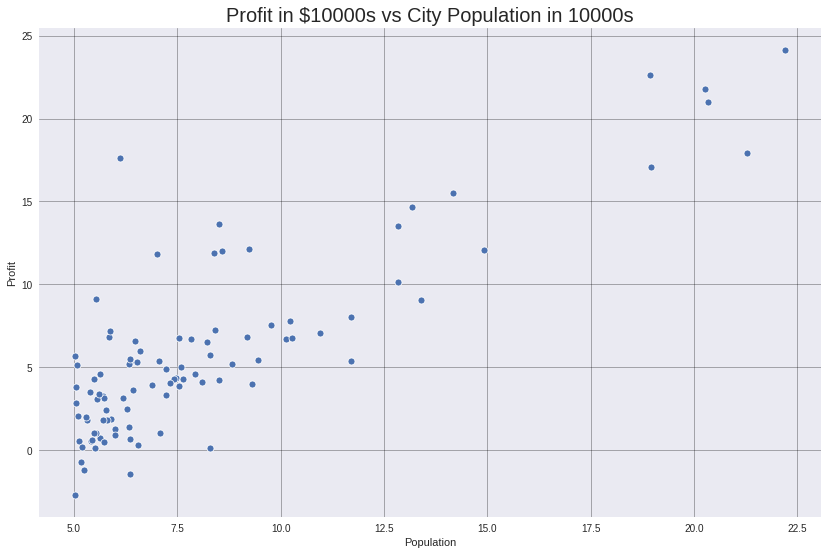

In [6]:
plt.figure(figsize = (14,9))
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = dados)
ax.set_title('Profit in $10000s vs City Population in 10000s', fontsize = 20)
plt.grid(color = 'black', alpha = 0.3)
plt.show()

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [7]:
def CostFunction(X, y, theta):
    m = len(y)
    yPred = X.dot(theta)
    error = (yPred - y)**2
    
    return 1/(2*m)*np.sum(error)

In [8]:
m = dados.Population.values.size
X = np.append(np.ones((m, 1)), dados.Population.values.reshape(m, 1), axis = 1)
y = dados.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

CostFunction(X, y, theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [9]:
def GradientDescent(X, y, theta, alpha, iteractions):
    m = len(y)
    costs = []
    for i in range(iteractions):
        yPred = X.dot(theta)
        error = np.dot(X.transpose(), (yPred - y))
        theta -= alpha*(1/m)*error
        costs.append(CostFunction(X, y, theta))
    return theta, costs

In [10]:
theta, costs = GradientDescent(X, y, theta, alpha = 0.01, iteractions = 2000)

print('h(x) = {} + {}x1'.format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

costValues = np.zeros((len(theta0),len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i], theta1[j]])
        costValues[i, j] = CostFunction(X, y, t)

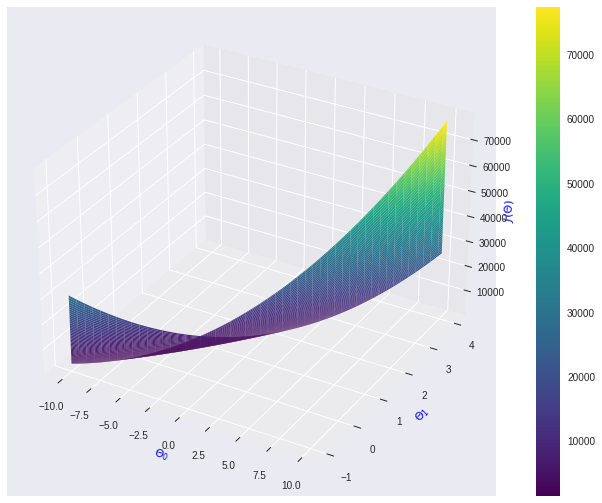

In [13]:
fig = plt.figure(figsize = (14, 9))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta0, theta1, costValues, cmap = 'viridis')

fig.colorbar(surf, shrink = 1, aspect = 20)

ax.set_xlabel('$\Theta_0$', color = 'b')
ax.set_ylabel('$\Theta_1$', color = 'b')
ax.set_zlabel('$J(\Theta)$', color = 'b')

#ax.view_init(35, 32)

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

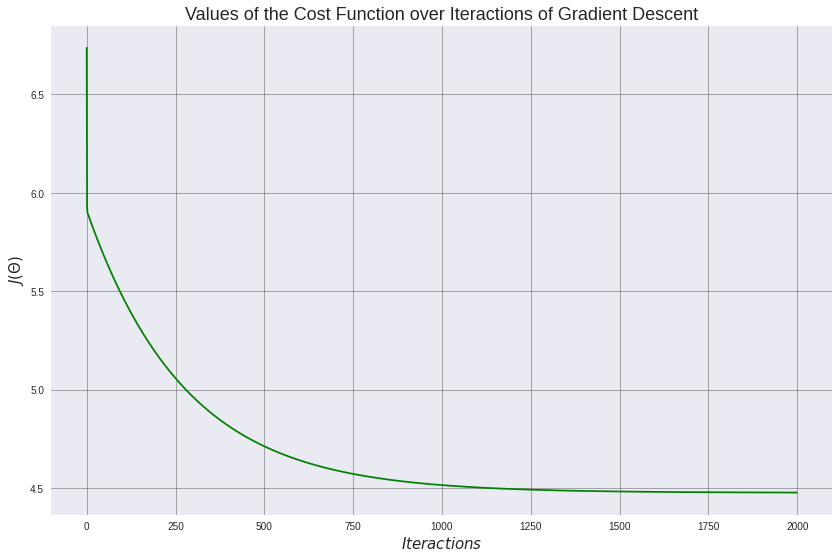

In [14]:
plt.figure(figsize = (14, 9))
plt.plot(costs, 'g')
plt.grid(color = 'black', alpha = 0.3)
plt.xlabel('$Iteractions$', fontsize = 15)
plt.ylabel('$J(\Theta)$', fontsize = 15)
plt.title('Values of the Cost Function over Iteractions of Gradient Descent', fontsize = 18);

### Task 8: Training Data with Linear Regression Fit
---

In [15]:
theta.shape

(2, 1)

In [16]:
theta

array([[-3.78806857],
       [ 1.18221277]])

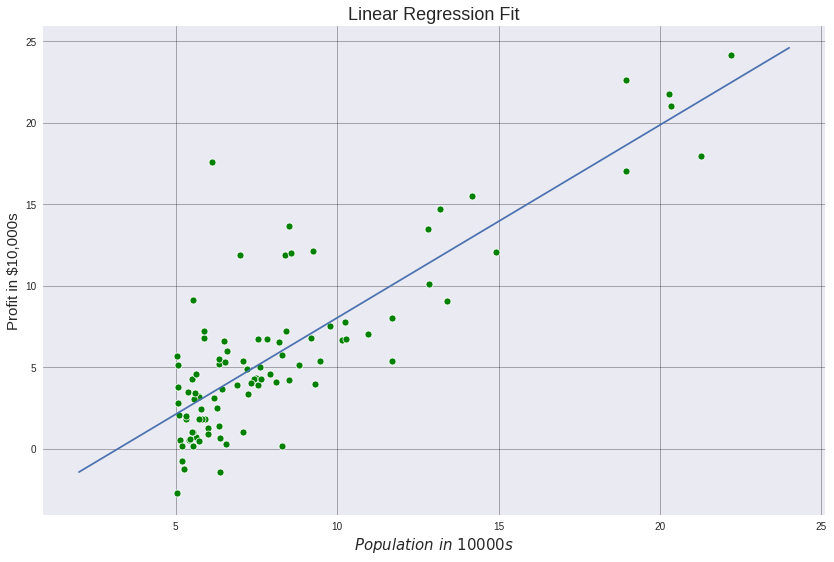

In [17]:
plt.figure(figsize = (14, 9))

theta = np.squeeze(theta)
sns.scatterplot(x = 'Population', y = 'Profit', color = 'g', data = dados)

xValue = [x for x in range(2,25)]
yValue = [(x*theta[1] + theta[0]) for x in xValue]
sns.lineplot(xValue, yValue)

plt.grid(color = 'black', alpha = 0.3)
plt.xlabel('$Population\ in\ 10000s$', fontsize = 15)
plt.ylabel('Profit in $10,000s', fontsize = 15)
plt.title('Linear Regression Fit', fontsize = 18);

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [18]:
def Predict(x, theta):
    yPred = np.dot(theta.transpose(), x)
    return yPred

In [19]:
yPred1 = Predict(np.array([1, 4]), theta)*10000
print('For a population of 40,000 people, the model predicts a profit of $' + str(round(yPred1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [20]:
yPred2 = Predict(np.array([1, 8.3]), theta)*10000
print('For a population of 40,000 people, the model predicts a profit of $' + str(round(yPred2, 0)))

For a population of 40,000 people, the model predicts a profit of $60243.0
